# Exploratory data analysis of One-Plus-7 Review

**The data is scraped from [One plus 7 Customer Reviews](https://www.amazon.in/OnePlus-Display-Storage-3700mAH-Battery/product-reviews/B07HGBMJT6/ref=cm_cr_getr_d_paging_btm_next_8?ie=UTF8&reviewerType=all_reviews&pageNumber=1)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data1.csv")
df.head()

,date,helpful,name,rating,review,size
0,07-Jun-19,"1,632 people found this helpful",AMIT,5.0 out of 5 stars,Beast at affordable Pricing,Size: 6GB+128GB
1,07-Jun-19,"2,780 people found this helpful",Govinda Dasa,5.0 out of 5 stars,The Saviour of the Brand,Size: 8GB+256GB
2,07-Jun-19,"1,100 people found this helpful",Nishit Joshi,5.0 out of 5 stars,Marvelous piece of excellence,Size: 8GB+256GB
3,13-Jun-19,811 people found this helpful,Kanwaljeet singh,1.0 out of 5 stars,defaulted phone,Size: 6GB+128GB
4,07-Jun-19,456 people found this helpful,Kamal Kumar,1.0 out of 5 stars,Don't buy,Size: 6GB+128GB


In [3]:
df.date=pd.to_datetime(df.date)
df['year']=df.date.dt.year
df['day']=df.date.dt.day
df['day_of_week']=df.date.dt.dayofweek
df['month']=df.date.dt.month
df.index=pd.DatetimeIndex(df['date'])

In [4]:
df.head()

,date,helpful,name,rating,review,size,year,day,day_of_week,month
date,,,,,,,,,,
2019-06-07,2019-06-07,"1,632 people found this helpful",AMIT,5.0 out of 5 stars,Beast at affordable Pricing,Size: 6GB+128GB,2019,7,4,6
2019-06-07,2019-06-07,"2,780 people found this helpful",Govinda Dasa,5.0 out of 5 stars,The Saviour of the Brand,Size: 8GB+256GB,2019,7,4,6
2019-06-07,2019-06-07,"1,100 people found this helpful",Nishit Joshi,5.0 out of 5 stars,Marvelous piece of excellence,Size: 8GB+256GB,2019,7,4,6
2019-06-13,2019-06-13,811 people found this helpful,Kanwaljeet singh,1.0 out of 5 stars,defaulted phone,Size: 6GB+128GB,2019,13,3,6
2019-06-07,2019-06-07,456 people found this helpful,Kamal Kumar,1.0 out of 5 stars,Don't buy,Size: 6GB+128GB,2019,7,4,6


**In India Oneplus7 was launched on 1 June 2019,below are the EDA for the product review**

In [5]:
print("Data is ranging from {} to {}".format(df.index.min(),df.index.max()))

Data is ranging from 2019-06-07 00:00:00 to 2019-09-22 00:00:00


**Rating**

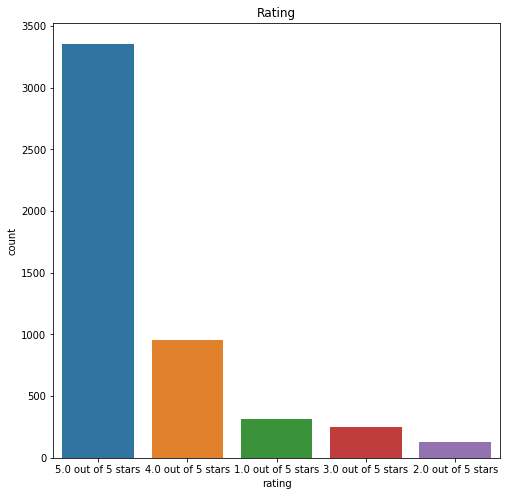

In [6]:
plt.figure(figsize=(8,8))
rev_freq = df.rating.value_counts()
plt.title('Rating')
sns.countplot(x="rating", data=df, order=rev_freq.index)

**Review / Month**

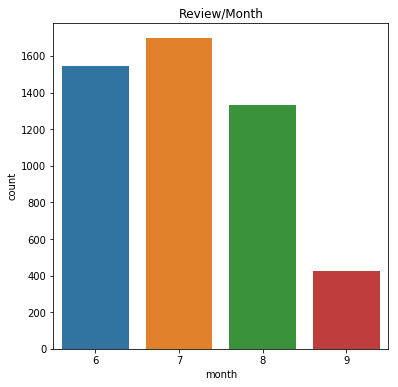

In [7]:
plt.figure(figsize=(6,6))
plt.title('Review/Month')
sns.countplot(x="month", data=df)

**Review / Day**

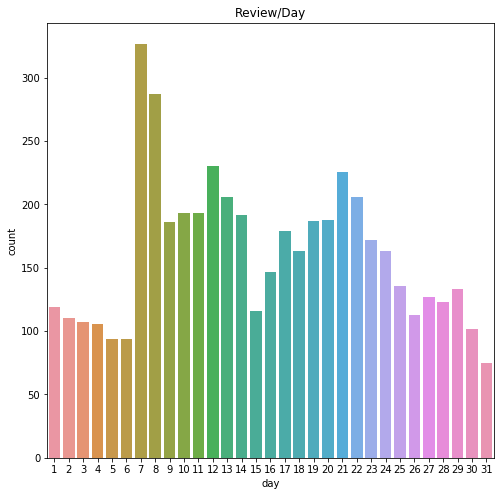

In [8]:
plt.figure(figsize=(8,8))
plt.title('Review/Day')
sns.countplot(x="day", data=df)

In [9]:
rev_per_day = pd.DataFrame(df.resample('D').size())
rev_per_day["MEAN"] = df.resample('D').size().mean()
rev_per_day["STD"] = df.resample('D').size().std()
UCL = rev_per_day['MEAN'] + 3 * rev_per_day['STD']
LCL = rev_per_day['MEAN'] - 3 * rev_per_day['STD']

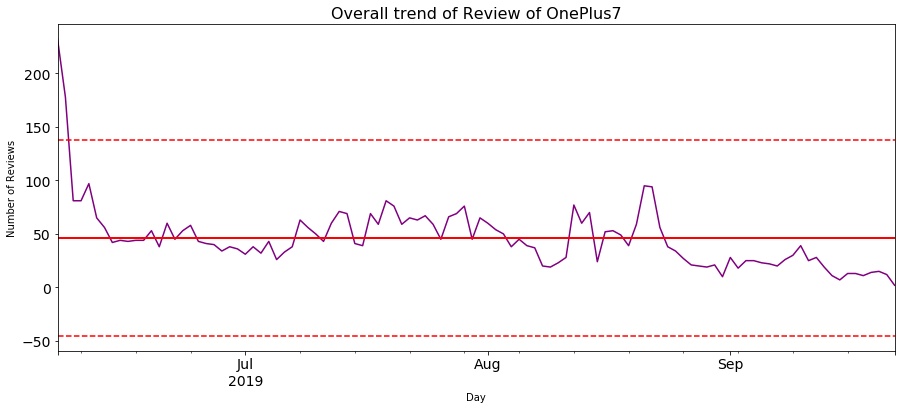

In [10]:
plt.figure(figsize=(15,6))
df.resample('D').size().plot(label='Review per day', color='purple')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
rev_per_day['MEAN'].plot(color='red', linewidth=2, label='Average')
plt.title('Overall trend of Review of OnePlus7', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of Reviews')
plt.tick_params(labelsize=14)

Text(0.5, 1.0, 'Overall trend of Reviews(by month)')

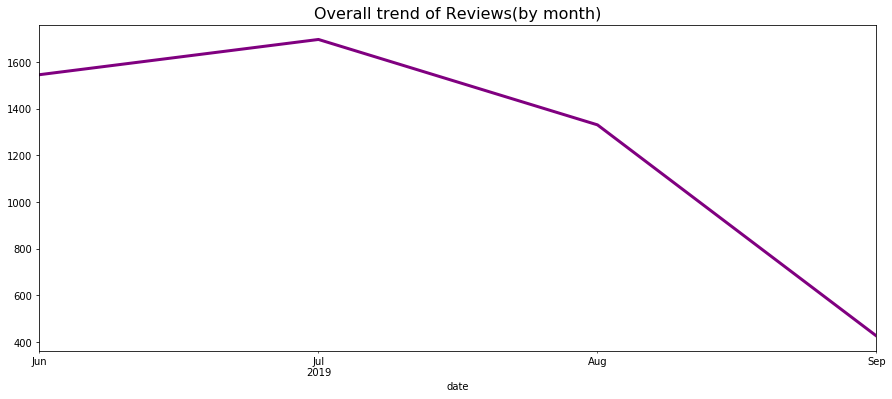

In [11]:
month_df =df.resample('M').size()
plt.figure(figsize=(15,6))
month_df.plot(label='Total reviews per month',linewidth=3, color='purple')
month_df.rolling(window=12).mean().plot(color='red', linewidth=2, label='12-Months Average')
plt.title('Overall trend of Reviews(by month)', fontsize=16)

In [12]:
print("Best Month : {0}: {1}".format(month_df.idxmin(), month_df[month_df.idxmax()]))
print("Worst Month : {0}: {1}".format(month_df.idxmax(), month_df[month_df.idxmin()]))

Best Month : 2019-09-30 00:00:00: 1697
Worst Month : 2019-07-31 00:00:00: 426


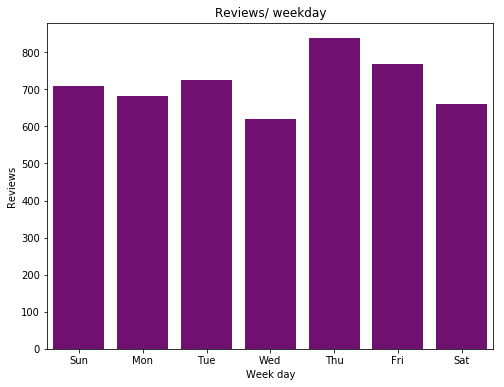

In [13]:
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
week_df = pd.DataFrame(df["day_of_week"].value_counts()).sort_index()
week_df["day"] = weekdays
week_df.columns = ["Reviews", "Week day"]
plt.figure(figsize=(8,6))
plt.title("Reviews/ weekday")
sns.barplot(x="Week day", y="Reviews", color="purple", data=week_df)

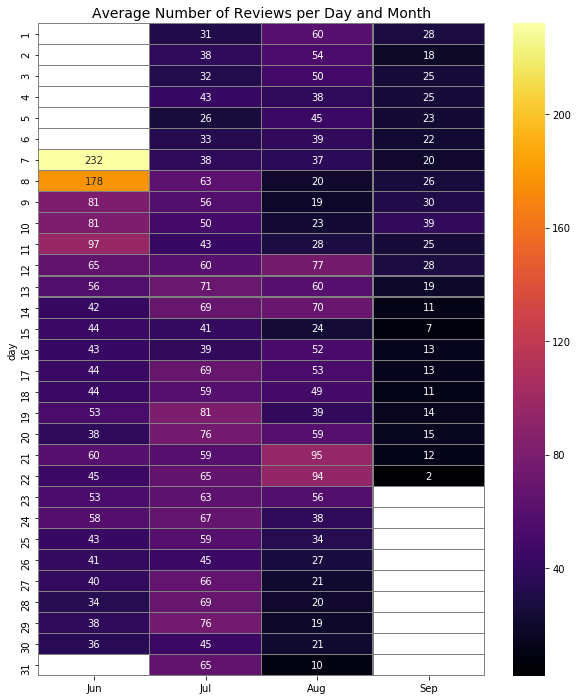

In [14]:
months = ['Jun','Jul','Aug','Sep']
reviews_pt = df.pivot_table(values='year', index='day', columns='month', aggfunc=len)
reviews_pt_year_count = df.pivot_table(values='year', index='day', columns='month', aggfunc=lambda x: len(x.unique()))
reviews_avg = reviews_pt / reviews_pt_year_count
reviews_avg.columns = months
plt.figure(figsize=(10,12))
plt.title('Average Number of Reviews per Day and Month', fontsize=14)
sns.heatmap(reviews_avg.round(), cmap='inferno', linecolor='grey',linewidths=0.1, cbar=True, annot=True, fmt=".0f")